# Ratings Prediction Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_excel("products_ratings_and_reviews.xlsx")
df

Rating                                             Review
0         3.0  I have give 3 star for1st for Fast delivery an...
1         5.0                                          Nice good
2         1.0  I got delivery *10 days* ago and my printer is...
3         5.0                                 So no good printer
4         1.0                                              Worst
...       ...                                                ...
28599     4.0                         Small budjet great product
28600     5.0                                               Nice
28601     5.0                                         Nice sound
28602     5.0                                       Good quality
28603     1.0                                           Very bad

[28604 rows x 2 columns]

## Features Description

    1. Rating - Products Rating
    2. Review - Users Review

# EDA

In [3]:
# number of rows/instances and columns/features present in the dataset
df.shape

(28604, 2)

In [4]:
# features names
df.columns

Index(['Rating', 'Review'], dtype='object')

In [5]:
# features Non-Null Count and DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28604 entries, 0 to 28603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  28540 non-null  float64
 1   Review  28539 non-null  object 
dtypes: float64(1), object(1)
memory usage: 447.1+ KB


In [6]:
# features Null Count
df.isnull().sum()

Rating    64
Review    65
dtype: int64

In [7]:
# dropping the NaN values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

In [9]:
# number of unique options/values present in 'Rating' column
df['Rating'].unique()

array([3., 5., 1., 4., 2.])

### Observations:
        There are only 5 options/values in 'Rating' i.e., 1.0, 2.0, 3.0, 4.0, 5.0.

5.0    15541
4.0     5226
1.0     4504
3.0     2073
2.0     1131
Name: Rating, dtype: int64


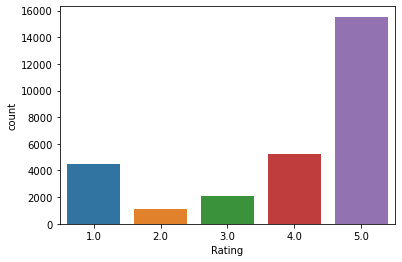

In [10]:
# the count of each option/value of 'Rating'
print(df['Rating'].value_counts())
sns.countplot(df['Rating'])
plt.show()

### Observations:
        Imbalanced Dataset

In [11]:
# class ratio
print('Rating:1 Ratio:-',round(len(df[df['Rating']==1.0]) / len(df['Rating']),2)*100,'%')
print('Rating:2 Ratio:-',round(len(df[df['Rating']==2.0]) / len(df['Rating']),2)*100,'%')
print('Rating:3 Ratio:-',round(len(df[df['Rating']==3.0]) / len(df['Rating']),2)*100,'%')
print('Rating:4 Ratio:-',round(len(df[df['Rating']==4.0]) / len(df['Rating']),2)*100,'%')
print('Rating:5 Ratio:-',round(len(df[df['Rating']==5.0]) / len(df['Rating']),2)*100,'%')

Rating:1 Ratio:- 16.0 %
Rating:2 Ratio:- 4.0 %
Rating:3 Ratio:- 7.000000000000001 %
Rating:4 Ratio:- 18.0 %
Rating:5 Ratio:- 55.00000000000001 %


# Data Cleaning

## Removing Emojis

In [12]:
df['Review'][8]

'nice product ,😊'

In [13]:
df['Review'][72]

'Really very Good printer 👌👌👌😎😎And printing quality of both colour and Black&White is too good ya 🥳🥳😇😇'

    Some reviews contains emojis, we do not need these emojis, hence we can remove/drop these from the dataset.
    The code snippet below encodes all the data into ASCII (American Standard Code for Information Interchange) values and ignore if the data can not be encoded. After encoding it tries to decode them all again because all the emojis were ignored in the encoding process. So now we have all the data without emojis.

In [14]:
# removing emojis
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [15]:
df['Review'][8]

'nice product ,'

In [16]:
df['Review'][72]

'Really very Good printer And printing quality of both colour and Black&White is too good ya '

    Hence removed unwanted emojis

In [17]:
# converting all 'reviews' to lower case
df['Review']=df['Review'].str.lower()

# replacing 'numbers' with 'space'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', ' ')

# replacing 'money symbols' with 'space'
df['Review'] = df['Review'].str.replace(r'₹', '').replace(r'$', '')

# removing punctuation
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

# replacing 'wide-space' between terms/words with a single space
df['Review'] = df['Review'].str.replace(r'\s+', ' ')

# removing leading and trailing wide-space
df['Review'] = df['Review'].str.replace(r'^\s+|\s+?$', '')

In [18]:
df.head()

Rating                                             Review
0    3.0  i have give star for st for fast delivery and ...
1    5.0                                          nice good
2    1.0  i got delivery days ago and my printer is show...
3    5.0                                 so no good printer
4    1.0                                              worst

In [19]:
# features Non-Null Count and DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28475 entries, 0 to 28603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  28475 non-null  object
 1   Review  28475 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [20]:
# converting 'Rating' column into 'float' Dtype
df['Rating']=df['Rating'].astype(float)

In [21]:
# for analysis purpose only
# checking the 'Review' length
df['Review_Length']=df['Review'].str.len()

In [22]:
df.head()

Rating                                             Review  Review_Length
0     3.0  i have give star for st for fast delivery and ...            439
1     5.0                                          nice good              9
2     1.0  i got delivery days ago and my printer is show...            134
3     5.0                                 so no good printer             18
4     1.0                                              worst              5

In [23]:
# importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# importing stopwords
from nltk.corpus import stopwords

In [24]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# before lemmatization
df['Review'][0]

'i have give star for st for fast delivery and good behavior of shipment master nd star for easy to use and print rd star for adf technology i have cut star for th star not given because adf is not print duplex th start not given because when i connects to wifi it displays to connect dcp l dw model instead of dcp l dw if there is th star is given in option then i also cut it because i want to extend warranty but there is no option given'

In [26]:
# removing 'stop words' and any words whose length is less than 2 and lemmatizing words

df['Review'] = df['Review'].apply(lambda x: ' '.join(
                WordNetLemmatizer().lemmatize(words,pos='v') for words in x.split() 
                if words not in stop_words and len(words)>2))

In [27]:
# after lemmatization
df['Review'][0]

'give star fast delivery good behavior shipment master star easy use print star adf technology cut star star give adf print duplex start give connect wifi display connect dcp model instead dcp star give option also cut want extend warranty option give'

In [28]:
# for analysis purpose only
df['Cleaned_Length']=df['Review'].str.len()

In [29]:
df.head()

Rating                                             Review  Review_Length  \
0     3.0  give star fast delivery good behavior shipment...            439   
1     5.0                                          nice good              9   
2     1.0  get delivery days ago printer show jam issue d...            134   
3     5.0                                       good printer             18   
4     1.0                                              worst              5   

   Cleaned_Length  
0             250  
1               9  
2             105  
3              12  
4               5

In [30]:
print('Original Length:',df['Review_Length'].sum())
print('Cleaned Length :',df['Cleaned_Length'].sum())
print('Difference     :',df['Review_Length'].sum()-df['Cleaned_Length'].sum())

Original Length: 6914853
Cleaned Length : 4522443
Difference     : 2392410


In [31]:
# importing WordCloud
from wordcloud import WordCloud

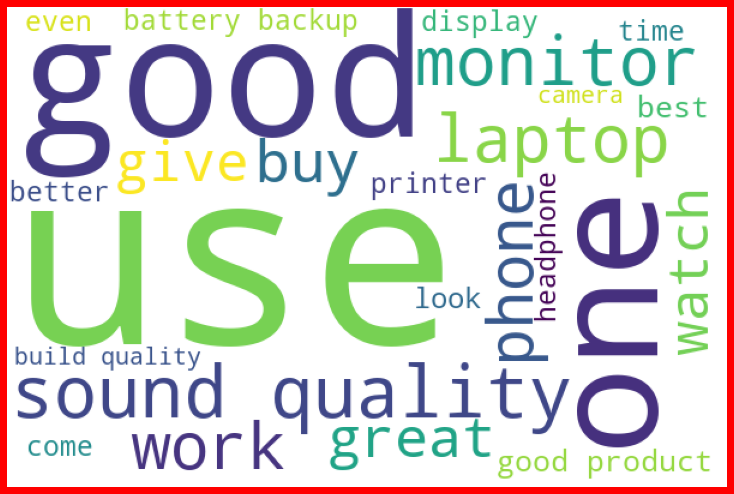

In [32]:
# cloud words in Rating:5.0

r5 = df['Review'][df['Rating']==5.0]
r5_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(r5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(r5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

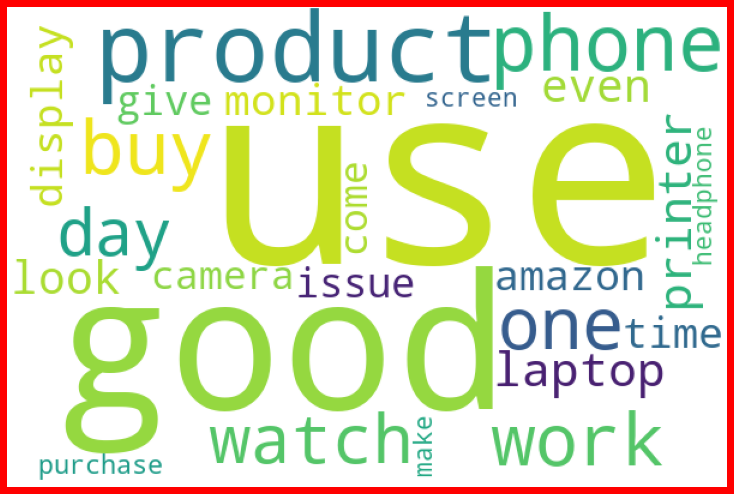

In [58]:
# cloud words in Rating:1.0

r1 = df['Review'][df['Rating']==1.0]
r1_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(r1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(r1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations:
        By looking at the cloud words generated for Rating:1 and Rating:5 we can conclude that the quality of data is not good enough.

# Model Training And Testing

In [33]:
# importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# importing models and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# TfidfVectorizer Model

tf_idf = TfidfVectorizer()

# transforming text into features
features = tf_idf.fit_transform(df['Review'])

In [36]:
# splitting data
x = features
y = df['Rating']

In [37]:
# splitting data into train set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

5.0    11656
4.0     3919
1.0     3378
3.0     1555
2.0      848
Name: Rating, dtype: int64


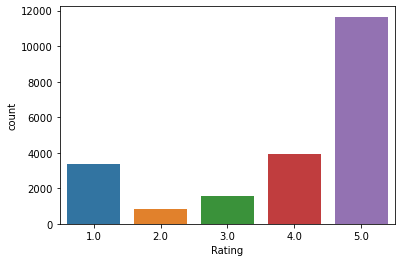

In [38]:
# the count of each option/value in 'y_train'
print(y_train.value_counts())
sns.countplot(y_train)
plt.show()

### Observations:
        The class is imbalanced

# Handling The Imbalanced Dataset

## SMOTE Method

In [39]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

In [40]:
# over_sampling class
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [41]:
from collections import Counter

print("Before Over_sampling:",Counter(y_train))
print("After Over_sampling :",Counter(y_train_smote))

Before Over_sampling: Counter({5.0: 11656, 4.0: 3919, 1.0: 3378, 3.0: 1555, 2.0: 848})
After Over_sampling : Counter({5.0: 11656, 4.0: 11656, 1.0: 11656, 3.0: 11656, 2.0: 11656})


3.0    11656
2.0    11656
1.0    11656
4.0    11656
5.0    11656
Name: Rating, dtype: int64


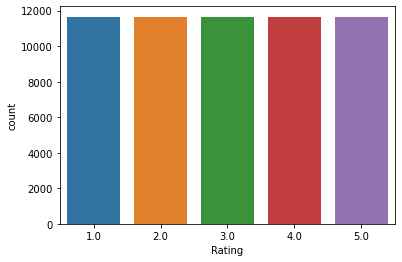

In [42]:
# the count of each option/value in 'y_train_smote'
print(y_train_smote.value_counts())
sns.countplot(y_train_smote)
plt.show()

### Observations:
        The class is balanced

In [43]:
# models list
mod_list = [MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
            GradientBoostingClassifier(),SGDClassifier()]

# Finding The Best Model

In [44]:
for mod in mod_list:
    print(mod)
    mod.fit(x_train_smote,y_train_smote)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('***************************************************************************************')

MultinomialNB()
Accuracy score: 54.31942688579857
[[ 588  126   79  113  220]
 [  82   66   28   35   72]
 [  96   49  100  123  150]
 [ 165   53   82  468  539]
 [ 336  102  154  648 2645]]
              precision    recall  f1-score   support

         1.0       0.46      0.52      0.49      1126
         2.0       0.17      0.23      0.19       283
         3.0       0.23      0.19      0.21       518
         4.0       0.34      0.36      0.35      1307
         5.0       0.73      0.68      0.70      3885

    accuracy                           0.54      7119
   macro avg       0.38      0.40      0.39      7119
weighted avg       0.56      0.54      0.55      7119

***************************************************************************************
DecisionTreeClassifier()
Accuracy score: 55.204382638010955
[[ 559   92  116  119  240]
 [  78   75   39   25   66]
 [  93   25  185   94  121]
 [ 128   55  157  569  398]
 [ 357   98  367  521 2542]]
              precision    reca

### Observations:
        From above it is evident that Random Forest Classifier model is performing better with an accuracy score of 60% to 62%.

In [45]:
rfc=RandomForestClassifier()
rfc.fit(x_train_smote,y_train_smote)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print('Training score:',rfc.score(x_train_smote,y_train_smote)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 60.317460317460316
Training score: 92.57892930679479
[[ 653   60   67   86  260]
 [ 105   55   21   22   80]
 [  86   20  163   70  179]
 [ 146   19   89  522  531]
 [ 342   39  247  356 2901]]
              precision    recall  f1-score   support

         1.0       0.49      0.58      0.53      1126
         2.0       0.28      0.19      0.23       283
         3.0       0.28      0.31      0.30       518
         4.0       0.49      0.40      0.44      1307
         5.0       0.73      0.75      0.74      3885

    accuracy                           0.60      7119
   macro avg       0.46      0.45      0.45      7119
weighted avg       0.60      0.60      0.60      7119



### Let's perform hyper-parameter tuning on Random Forest Classifier model.

## Hyper-parameter Tuning

In [46]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [47]:
parameter1 = {
    'criterion':['gini','entropy']    
}

gscv1 = GridSearchCV(rfc,parameter1,scoring='accuracy')
gscv1.fit(x_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [48]:
parameter2 = {
    'max_features':['auto','sqrt','log2']
}

gscv2 = GridSearchCV(rfc,parameter2,scoring='accuracy')
gscv2.fit(x_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [49]:
parameter3 = {
    'oob_score':[True,False]
}

gscv3 = GridSearchCV(rfc,parameter3,scoring='accuracy')
gscv3.fit(x_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'oob_score': [True, False]}, scoring='accuracy')

In [50]:
print(gscv1.best_params_,
      gscv2.best_params_,
      gscv3.best_params_
      )

{'criterion': 'entropy'} {'max_features': 'log2'} {'oob_score': True}


In [51]:
rfc=RandomForestClassifier(criterion='entropy',max_features='log2',oob_score='True')
rfc.fit(x_train_smote,y_train_smote)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print('Training score:',rfc.score(x_train_smote,y_train_smote)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 61.17432223626914
Training score: 92.57892930679479
[[ 626   61   57   70  312]
 [  86   54   20   22  101]
 [  86   17  147   54  214]
 [ 135   18   88  501  565]
 [ 294   39  219  306 3027]]
              precision    recall  f1-score   support

         1.0       0.51      0.56      0.53      1126
         2.0       0.29      0.19      0.23       283
         3.0       0.28      0.28      0.28       518
         4.0       0.53      0.38      0.44      1307
         5.0       0.72      0.78      0.75      3885

    accuracy                           0.61      7119
   macro avg       0.46      0.44      0.45      7119
weighted avg       0.60      0.61      0.60      7119



In [52]:
# importing roc_auc_score
from sklearn.metrics import roc_auc_score

In [55]:
# roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
ra_score = roc_auc_score(y_test,y_pred_proba,multi_class='ovr')
ra_score

0.7684744039557148

In [60]:
import joblib

# saving the best model for production
joblib.dump(rfc,'Ratings_Prediction_Model.obj')

['Ratings_Prediction_Model.obj']